In [25]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install keras
!pip install sklearn

In [34]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
from pandas import concat
from numpy import array
from numpy import argmax
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler #最大最小值設定
from sklearn.preprocessing import LabelEncoder #標籤(建立整數編碼
from sklearn.preprocessing import OneHotEncoder #標籤(為整數編碼建立one hot encoding
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [6]:
#數據檢視
df = pd.read_csv(r'C:\Users\Emo\Desktop\AQI_shang\LSTM_test\Dayuan_1212.csv')
print(len(df))
df.head(10)


4279


,Unnamed: 0,Date,PM2.5,AQI,SO2,CO,O3,PM10,NO2,NOx,NO,WindSpeed,WindDirec,Temp,Humidity
0,0,2021/6/1 0:00,10.0,34.0,5.0,0.42,16.6,11.0,23.900000,24.40000,0.500000,1.3,249.0,23.5,99.0
1,1,2021/6/1 1:00,12.0,34.0,2.7,0.42,14.2,19.0,19.700000,20.20000,0.500000,1.9,177.0,23.5,100.0
2,2,2021/6/1 2:00,11.0,35.0,3.8,0.51,8.1,19.0,19.700000,22.40000,2.700000,2.1,168.0,23.5,100.0
3,3,2021/6/1 3:00,17.0,38.0,4.6,0.54,3.1,16.0,25.700000,29.00000,3.300000,1.9,195.0,23.2,100.0
4,4,2021/6/1 4:00,14.0,40.0,4.5,0.43,6.7,19.0,20.900000,24.00000,3.100000,1.8,262.0,23.4,100.0
5,5,2021/6/1 5:00,12.0,40.0,4.2,0.35,11.9,17.0,16.600000,21.60000,5.100000,1.5,153.0,24.0,100.0
6,6,2021/6/1 6:00,17.0,44.0,3.5,0.39,7.5,22.0,17.200000,27.70000,10.500000,1.8,148.0,24.6,100.0
7,7,2021/6/1 7:00,14.0,43.0,4.0,0.43,4.1,23.0,19.100000,37.70000,18.600000,1.0,136.0,27.0,89.0
8,8,2021/6/1 8:00,17.0,45.0,5.2,0.49,8.3,26.0,10.473341,12.84861,2.404796,1.8,148.0,28.8,80.0
9,9,2021/6/1 9:00,10.0,44.0,5.3,0.41,24.7,22.0,10.473341,12.84861,2.404796,1.7,66.0,30.6,74.0


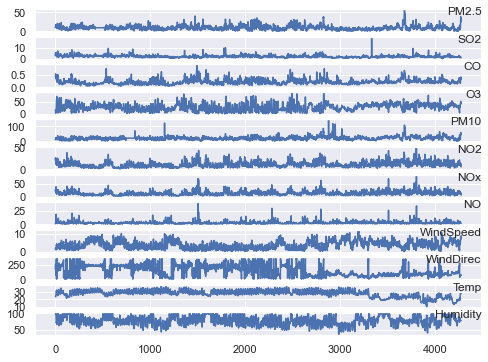

In [23]:
#風向可視化
values = df.values
# 指定要可視化的列
groups = [2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
i = 1
# plot each column
plt.figure(figsize=(8,6))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [36]:
#df['t'] = [x for x in range(4279)]
#df['t-1'] = df['t'].shift(-1)
#print(df)

In [53]:
# 將序列轉換成監督式學習
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # 輸入序列(t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # 預測序列 (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-1))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # 將他們整合在一起
    agg = concat(cols, axis=1)
    agg.columns = names
    # 刪除那些包含空值(NaN)的行
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = scaler.fit_transform(values)
# 將時間序列數據轉換成監督學習數據
#reframed = series_to_supervised(scaled, 1, 1)
# 刪除那些不需要預測的列
#reframed.drop(reframed.columns[[0, 1, 3]], axis=1, inplace=True)
#reframed.head()

values = [x for x in range(4279)]
data = series_to_supervised(values,15,1)
print(data)

#values = df.values
#對風向字段進行編碼
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# 確保所有變量都是實數型
#values = values.astype('float32')
#對數據進行標準化出來
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# 將時間序列數據轉換成監督學習數據
#reframed = series_to_supervised(scaled, 1, 1)
# 刪除那些不需要預測的列
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
#reframed.head()

      var1(t-15)  var1(t-14)  var1(t-13)  var1(t-12)  var1(t-11)  var1(t-10)  \
15           0.0         1.0         2.0         3.0         4.0         5.0   
16           1.0         2.0         3.0         4.0         5.0         6.0   
17           2.0         3.0         4.0         5.0         6.0         7.0   
18           3.0         4.0         5.0         6.0         7.0         8.0   
19           4.0         5.0         6.0         7.0         8.0         9.0   
...          ...         ...         ...         ...         ...         ...   
4273      4258.0      4259.0      4260.0      4261.0      4262.0      4263.0   
4274      4259.0      4260.0      4261.0      4262.0      4263.0      4264.0   
4275      4260.0      4261.0      4262.0      4263.0      4264.0      4265.0   
4276      4261.0      4262.0      4263.0      4264.0      4265.0      4266.0   
4277      4262.0      4263.0      4264.0      4265.0      4266.0      4267.0   

      var1(t-9)  var1(t-8)  var1(t-7)  

ValueError: Expected 2D array, got 1D array instead:
array=[0.000e+00 1.000e+00 2.000e+00 ... 4.276e+03 4.277e+03 4.278e+03].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
# 將數據分割爲訓練集和測試集
values = reframed.values
n_train_hours = 365 * 24 #1年
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分離出特徵集與標籤
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# 轉換成3維數組 [樣本數, 時間步 ,特徵數]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
# 創建模型
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
print(model.summary())

In [ ]:
# 訓練模型
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# 對損失進行可視化
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# 對測試集進行預測
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# 對預測值進行逆標準處理
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# 對測試集標籤進行逆標準化處理
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# 計算 RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# 設置預測未來3小時的污染
n_hours = 3
n_features = 8
# 將時間序列轉換成監督學習數據集
reframed = series_to_supervised(scaled, n_hours, 1)

In [ ]:
# 分離訓練集和測試集
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# 分離特徵集和標籤
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

In [ ]:
# 轉換成3維數據格式 [樣本數, 時間步, 特徵數]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

In [ ]:
# 定義模型
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# 訓練模型
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# 可視化
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# 對測試集進行預測
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
# 對預測數據進行逆標準化
inv_yhat = np.concatenate((yhat, test_X[:, -7:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# 對測試集標籤進行逆標準化
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -7:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# 計算均方根誤差
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)